# 第14回 データの読み方

___
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tsuboshun/begin-python/blob/gh-pages/_sources/workbook/lecture14.ipynb)

___

## この授業で学ぶこと

前回はデータの可視化をテーマに、matplotlibとpandasの使い方について学んだ。
今回はこれらのライブラリを活用しながら、データ分析の手法・考え方について代表的なものを学ぶ。

データサイエンスにおいてデータ分析は中心的な役割を持つ。データサイエンスにおいてよくある一連のプロセスは以下の通りである：データ収集、データクリーニング、データ分析、モデル作成、予測と解釈。ここで言うモデルとは世間的にはAIと呼ばれるもので、例えば過去のデータをもとに将来の施策に対する効果を予測するのに用いられる。データ分析はその前段階にあたるプロセスで、データについての理解を深め、データからどのような知見を引き出すことができるか、ひいてはどのような予測モデルを構築できそうか当たりをつけるために行う。決められた手順があるわけではないので、**探索的データ分析**（exploratory data analysis, EDA）などと言うこともある。

今回はデータ分析の手法・考え方について学びながら、データ分析の雰囲気を体験してもらおうと思っている。最終回の次回は、分析内容も自分で考えながら、実際に手を動かしてデータ分析を行ってもらう。

## データの種類

データ分析を行うにあたって、どのような種類のデータを扱っているかを認識することが重要である。
この節では、データの大まかな分類について説明する。

まず、データは大まかに質的変数と量的変数に分けられる。
質的変数はさらに名義尺度と順序尺度に分類され、量的変数はさらに間隔尺度と比例尺度に分類される。

| 種類 | 尺度 | 概要 | 例 |
| --- | --- | --- | --- |
| 質的変数 | 名義尺度 | 分類のための尺度。順番にも間隔にも意味がない。 | 性別、血液型  |
| 質的変数 | 順序尺度 | 分類のための尺度。順番に意味があるが、間隔に意味がない。 | 5段階評価 |
| 量的変数 | 間隔尺度 | 量を表す尺度。順番にも間隔にも意味があるが、比率に意味がない。| 温度、西暦 |
| 量的変数 | 比例尺度 | 量を表す尺度。順番・間隔・比率に意味がある。 | 金額、重さ |

それぞれの尺度の概要は、上の表の通りである。例をもとに具体的に説明しよう。

名義尺度の例として、性別が挙げられる。性別は人間に男性または女性というラベルを割り当てたものであって、これらのラベルの順番に意味はないし、間隔というものを考えることもできない。

順序尺度の例として、5段階評価が挙げられる。
例えば顧客の満足度を1から5の整数で表してデータを集計したとして、これらの数値の順番には意味があるが、間隔には意味がない。
評価5は大満足、評価4は満足を表すのであって、評価5と評価4の差が、評価2と評価1の差と同じ程度のものかはわからない。

間隔尺度の例として、温度（℃）が挙げられる。
温度は順番にも間隔にも意味がある。しかし、0℃は人間が適当に決めた基準であって、それ以下がないという意味の絶対的な0度ではない。したがって、30℃は15℃の2倍という主張にあまり意味がない。実際、華氏（℉）に直すと30℃は86℉、15℃は59℉であり、0度の基準が異なれば、先ほどの主張が成立しなくなる。

比例尺度の例として、金額が挙げられる。金額は順番・間隔・比率に意味がある。例えば、100円玉を5枚集めると500円になるので、500円は100円の5倍という主張は正しい。

## データの分布と代表値

### 分布の可視化

データの**分布**とは、データの値が全体にどのように散らばっているか、または集中しているかを示すものである。データの分布を確認すると、データの全体的な構造や傾向を理解することができる。そのためデータ分析の最初の一歩として、データの分布を確認することが多い。この節ではデータの分布を調べ、そこから有用な情報を得るための方法をいくつか学ぶ。

この節で利用するライブラリのimportを行う。前回も利用した `'diamonds'` というテーブルデータを利用する。

In [1]:
pip install japanize_matplotlib

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import japanize_matplotlib
plt.rcParams.update({'font.size': 14})  # 文字サイズを14pxとする

In [3]:
df = sns.load_dataset('diamonds')

データの分布を確認するための可視化手法に**棒グラフ**と**ヒストグラム**がある。

質的変数などの取りうる値の種類が少ないデータに対しては、棒グラフを描くことが有効である。質的変数の取る値の種類を**カテゴリ**というが、カテゴリごとのデータ数を集計して棒グラフとしてプロットする例を以下に示す。

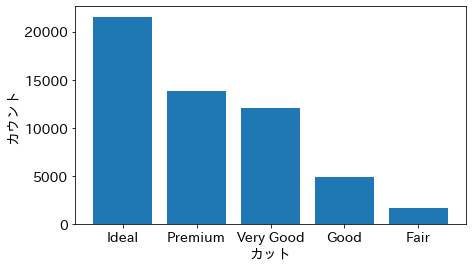

In [4]:
# プロットの入れ物の用意
fig, ax = plt.subplots(figsize=(7, 4))

# データの用意
cut_counts = df["cut"].value_counts()

# 棒グラフのプロット
ax.bar(cut_counts.index, cut_counts.values)

# 軸ラベルの設定
ax.set_xlabel("カット")
ax.set_ylabel("カウント")

# 表示
plt.show()

ここでシリーズの `value_counts()` メソッドにより、カテゴリをラベル、そのデータ数を要素とするシリーズを作成している。Axesの `bar()` メソッドに、indexと値を渡すことで棒グラフをプロットすることができる。

In [5]:
cut_counts  # カテゴリをラベル、データ数を要素とするシリーズ

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

量的変数などの取りうる値の種類が多いデータに対しては、ヒストグラムが有効である。

ヒストグラムはデータの値をいくつかの階級に分割し、階級ごとのデータ数を集計して可視化する。
ヒストグラムのプロット例を以下に示す。`diamonds` データセットにおける `"price"` の値を1次元配列として取得し、そのヒストグラムをプロットしている。

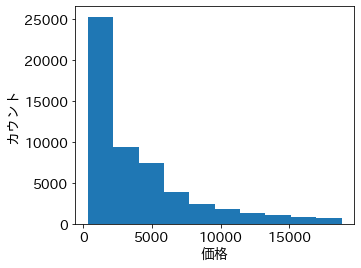

In [6]:
# プロットの入れ物の用意
fig, ax = plt.subplots(figsize=(5, 4))

# データの用意
x = df["price"].values

# ヒストグラムのプロット
ax.hist(x, bins=10)

# 軸ラベルの設定
ax.set_xlabel("価格")
ax.set_ylabel("カウント")

# 表示
plt.show()

Axesの `hist()` メソッドに1次元配列を渡すことで、ヒストグラムを作成できる。キーワード引数で `bins` を指定すると、横軸の分割数を指定できる（**ビン数**という）。ビン数を大きくすると、より細かい粒度で分布の形を確認できる。上のヒストグラムからは、例えば価格の低いダイヤモンドにデータ数が偏っていることが確認できる。

### 代表値

データの分布を確認する代わりに、分布を要約するような統計量を調べることもよく行われる。
このような統計量のことを**代表値**という。
代表値の例としては、平均値（または平均）、標準偏差、中央値などがある。

データが正規分布にしたがうときは、平均と標準偏差だけで分布を再現することができるので、これらは分布についての十分な情報を持つ。正規分布にしたがうデータについて、平均と標準偏差を求めて分布と照らし合わせてみよう。以下では、`np.random.normal()` 関数により平均10、標準偏差2の正規分布にしたがうデータを1000個生成し、そのヒストグラムを作成している。

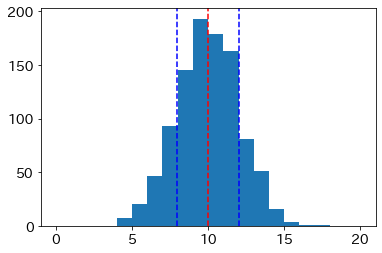

In [7]:
# プロットの入れ物の用意
fig, ax = plt.subplots(figsize=(6, 4))

# データの用意
x = np.random.normal(loc=10, scale = 2, size  = 1000)

# ヒストグラムのプロット
ax.hist(x, bins=20, range=(0, 20))

# 平均、標準偏差の可視化
mean = np.mean(x)
std = np.std(x)
ax.axvline(mean, linestyle='--', color='red')
ax.axvline(mean-std, linestyle='--', color='blue')
ax.axvline(mean+std , linestyle='--', color='blue')

# 表示
plt.show()

`sample_data` から求まる平均を $\hat{\mu}$、標準偏差を $\hat{\sigma}$ と書くとき、$\hat{\mu}-\hat{\sigma}$、$\hat{\mu}$、$\hat{\mu}+\hat{\sigma}$ の位置を `axvline()` メソッドによりそれぞれ縦の点線として表示している。
データが正規分布にしたがうとき、平均は分布のちょうど真ん中あたりに来る。また $\hat{\sigma}$ の大きさが、データの平均周りのバラつきの目安となる大きさであることも確認できる。

平均と標準偏差の記号にハットをつけたのは、これらはデータを生成するのに指定した平均と標準偏差から一般にズレた値になるからである。
後者を母平均、母標準偏差といい、これらの値を $\mu$、$\sigma$ で表す（ここでは $\mu = 10$、$\sigma = 2$）。

注意したいのが「**平均は必ずしも普通を表さない**」ということである。例えば、先ほどのダイヤモンドの価格の例で、平均の位置を縦の点線で表示すると次のようになる。

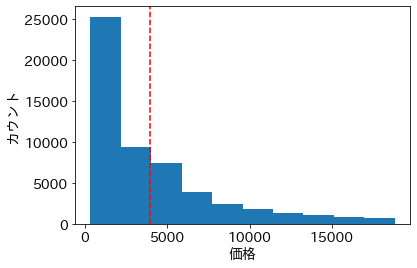

In [8]:
# プロットの入れ物の用意
fig, ax = plt.subplots(figsize=(6, 4))

# データの用意
x = df["price"].values

# ヒストグラムのプロット
ax.hist(x, bins=10)

# 平均の可視化
ax.axvline(np.mean(x), linestyle='--', color='red')

# 軸ラベルの設定
ax.set_xlabel("価格")
ax.set_ylabel("カウント")

# 表示
plt.show()

データ数のピークが左の方にある中で、赤の点線の位置を普通と捉えるのは疑問である。この例のように分布の裾が長く、歪んだ形をしているとき、平均値はあまり良い代表値とは言えなくなる。また例えば、このテーブルデータにたった1個1億ドルのダイヤモンドのデータを追加するだけで、平均値は右に1850ドル近くシフトする。このような**外れ値**に引っ張られるというのも、平均値の欠点の1つである。

また「中央値も必ずしも普通を表さない」。例えば同じサイズの釣鐘型の分布を2つ並べたような分布を考えると、中央値はちょうどそれらの中間に来るが、このとき中央値はどちらのピークも適切に表現しない。一方で、中央値は外れ値の影響を受けにくいという平均値にない長所を持つ。したがって、外れ値の多いデータにおいては平均値よりも中央値の方が代表値として適切な場合がある。

このように代表値を使うときにも、データの分布や外れ値の存在を把握して、適切な統計量を選択することが重要である。

### 変数変換

価格のような比例尺度は、対数をとると分布の形が綺麗になることが多い。

その理由は、価格の場合、差は比率で考える方が社会的な慣習としてより自然なためである。
例えば、10ドルの商品を11ドルに値上げするのと、1000ドルの商品を1001ドルに値上げするのとでは、前者の方が大きな値上げに感じると思う。
これは私たちが価格の差を比率で捉えることに慣れていることに起因する。

価格についてそのままヒストグラムを作成すると、例えばビンの幅を1ドルとして、10ドル 〜 11ドルのデータ数を1000ドル 〜 1001ドルのデータ数と比較することになる。しかし、高価格帯における1ドルの重みは低価格帯と比べて低いので、このような分割を行うと高価格帯ほどデータ数の少ない裾の長い分布が得られやすい。一方で、価格について対数をとってからヒストグラムを作成すると、例えば10ドル 〜 11ドルのデータ数は1000ドル 〜 1100ドルのデータ数と比較されることになる。これは $\log a - \log b = \log\frac{a}{b}$ より $\log$ のスケールで一定間隔をとることは、元のスケールで一定比率でビンを作るのと等しいためである。そして、価格においては対数をとることでデータの分布は釣鐘型に近くなることが多い。

価格について対数をとってから、ヒストグラムを作成する例を以下に示す。

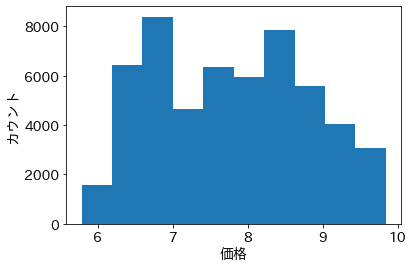

In [9]:
# プロットの入れ物の用意
fig, ax = plt.subplots(figsize=(6, 4))

# データの用意
x = np.log(df["price"].values)

# ヒストグラムのプロット
ax.hist(x, bins=10)

# 軸ラベルの設定
ax.set_xlabel("価格")
ax.set_ylabel("カウント")

# 表示
plt.show()

適切な変数変換を行うと、変換前には見えなかった特徴を見つけられることがある。この例ではピークが2つあるように見える。

### 層別分析

`diamonds` データセットのように複数の要素からなるデータに対しては、とある基準でデータをグループ分けしたあとで、グループごとに分析すると有効なことが多い。このような分析を**層別分析**という。

例として、カラットについて $(0, 0.5], (0.5, 1], (1, 1.5], (1.5, 2], (2, 6]$ の5つの範囲でグループ分けして、それぞれのグループで価格の分布を調べてみよう。ここで $(a, b]$ という記号は $a < x \leq b$ という不等式で表される区間を表す。

`pd.cut()` メソッドにシリーズと数値の配列を渡すと、シリーズの値を配列の数値で区切ってグループ分けした結果をシリーズとして返してくれる。
以下のコードでは、`pd.cut()` メソッドを使ってグループ分けを行い、その結果を `"carat_bin"` という新しい列に代入している。

In [10]:
bins = np.array([0, 0.5, 1, 1.5, 2, 6])
df['carat_bin'] = pd.cut(df['carat'], bins=bins)

In [11]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,carat_bin
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,"(0.0, 0.5]"
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,"(0.0, 0.5]"
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,"(0.0, 0.5]"
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,"(0.0, 0.5]"
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,"(0.0, 0.5]"


`"carat_bin"` の全てのカテゴリは、`df["carat_bin"].unique()` により取得できる。

In [12]:
df["carat_bin"].unique()

[(0.0, 0.5], (0.5, 1.0], (1.0, 1.5], (1.5, 2.0], (2.0, 6.0]]
Categories (5, interval[float64, right]): [(0.0, 0.5] < (0.5, 1.0] < (1.0, 1.5] < (1.5, 2.0] < (2.0, 6.0]]

それではカテゴリごとに、価格の分布をヒストグラムとしてプロットしてみよう。

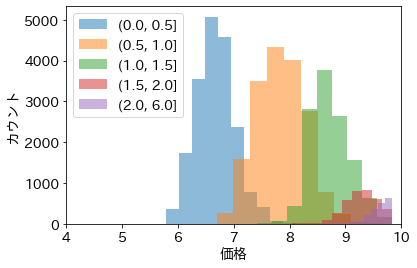

In [13]:
# プロットの入れ物の用意
fig, ax = plt.subplots(figsize=(6, 4))

# ヒストグラムのプロット
for group in df["carat_bin"].unique():
    df_subset = df.loc[df["carat_bin"] == group]
    x = np.log(df_subset["price"].values)
    ax.hist(x, bins=10, alpha=0.5, label=str(group))   # alphaは透明度を表す
    
# 軸の範囲を設定
ax.set_xlim((4, 10))

# 軸ラベルの設定
ax.set_xlabel("価格")
ax.set_ylabel("カウント")
    
# 表示
plt.legend()
plt.show()

層別分析を行う前に価格のヒストグラムをプロットしたときには、ピークが2つ見えていた。一方で上のプロットを見ると、カラットでグループ分けした後ではピークが1つの綺麗な釣鐘型をしている。これから例えば、カラットの大きさで価格が大体決まること、そしてカラットの分布にピークが複数あるために、価格の分布にピークが複数できているのではないかという仮説を立てることができる。

## 相関と因果

データ分析の主な目標として、複数の要素の間の関係を明らかにするという点が挙げられる。
ここでは2つの要素の関係を表す概念である相関と因果について解説する。

**相関**とは「データの見かけ上、一方の値が増えるときにもう一方の値が増える（または減る）」という関係のことをいう。一方の値が増えるときに、もう一方の値が増えるとき正の相関があるといい、もう一方の値が減るとき負の相関があるという。もう一方の値が増えるとも減るとも言えないとき、無相関であるという。

相関を調べるには、散布図をプロットするのが有効である。
例として、カラットと価格の間の関係を散布図により可視化してみよう。

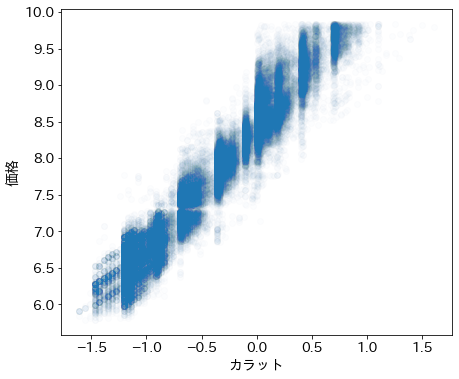

In [14]:
# プロットの入れ物の用意
fig, ax = plt.subplots(figsize=(7, 6))

# データの用意
x = np.log(df["carat"].values)
y = np.log(df["price"].values)

# 散布図
ax.scatter(x, y, alpha=0.01)

# 軸ラベルの設定
ax.set_xlabel("カラット")
ax.set_ylabel("価格")

# 表示
plt.show()

前回の課題でもカラットと価格の間の散布図をプロットしてもらったが、ここでは両者の値の対数をとってからプロットしている。
これを見ると、対数をとった後では、カラットと価格の間に直線に近い綺麗な正の相関があることが確かめられる。

上の例では量的変数の間の相関をみたが、質的変数と量的変数の間、質的変数と質的変数の間にも相関を考えることができる。
例として、カットと価格の相関を棒グラフにより可視化してみよう。

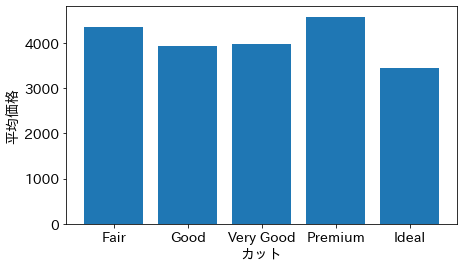

In [15]:
# プロットの入れ物の用意
fig, ax = plt.subplots(figsize=(7, 4))

# データの用意
mean_price = df.groupby('cut')['price'].mean()
order = ["Fair", "Good", "Very Good", "Premium", "Ideal"]
mean_price = mean_price.loc[order]  # シリーズの並び順をorderの順に変更

# 棒グラフのプロット
ax.bar(mean_price.index, mean_price.values)

# 軸ラベルの設定
ax.set_xlabel("カット")
ax.set_ylabel("平均価格")

# 表示
plt.show()

`df.groupby('cut')['price'].mean()` を実行すると、カットをindexとし、カットごとの価格の平均を値とするシリーズを取得できる。このコードは複雑に見えるかもしれないが、今はおまじないとして理解しておけばよい。また `mean_price = mean_price.loc[order]` によりシリーズのindexの順を `order` の順に設定することで、棒グラフの横軸の値がカットの質の低い順となるようにしている。そして `mean_price` のindexと値を、`ax.bar()` メソッドに渡すことにより棒グラフをプロットしている。

プロットを見ると、Premiumは例外的だが、大まかにはカットの質が上がるほど平均価格が下がるという負の相関があるように見える。
しかし、これは常識的に考えておかしな関係である。

この分析結果を理解するためには、「**相関は必ずしも因果を意味しない**」という点を理解することが重要である。ここで**因果**とは「一方の値を操作して変化させたときにもう一方の値が変化する」という関係のことをいう。要するに原因と結果の関係である。

例えば、先ほどのカラットと価格の間の正の相関は、実際の因果関係を反映したものであると推測することができる。なぜなら常識的に考えて、他の条件を固定してカラットを大きくすれば、原価の分、価格も合わせて高くなるはずだからである。一方で、カットと価格の間の負の相関は、実際の因果関係を表していないと考えられる。なぜなら常識的に考えて、他の条件を固定してカットの質を上げれば、手間隙のかかる分、価格も高くなるはずだからである。

後者のように実際の因果関係とは異なる見かけ上の相関のことを**擬似相関**という。擬似相関は多くの場合、2つの要素のほかに**交絡因子**という第三の要素が存在することにより起こる。カットと価格の間の負の相関は、カラットを交絡因子として以下のように理解できる。

まず、カットとカラットの間の相関を棒グラフにより可視化してみる。以下のコードでは、カットごとの平均カラットの値を棒グラフとしてプロットしている。

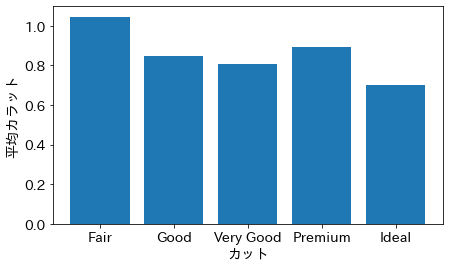

In [16]:
# プロットの入れ物の用意
fig, ax = plt.subplots(figsize=(7, 4))

# データの用意
mean_price = df.groupby('cut')['carat'].mean()
order = ["Fair", "Good", "Very Good", "Premium", "Ideal"]
mean_price = mean_price.loc[order]  # シリーズの並び順をorderの順に変更

# 棒グラフのプロット
ax.bar(mean_price.index, mean_price.values)

# 軸ラベルの設定
ax.set_xlabel("カット")
ax.set_ylabel("平均カラット")

# 表示
plt.show()

これを見ると、カットとカラットの間には大まかに負の相関があることがわかる。この相関が、実際の因果関係を反映したものか考えてみよう。カラットがカットに合わせて変わるということはあり得ないので、因果としてあり得るとしたらカットがカラットに合わせて変わるということである。これはあり得る話である。例えばカラットの小さいダイヤモンドを売るために、より質の高いカットを行う必要があるのかもしれない。一方で、カラットの大きいダイヤモンドは、カットの質によらず商品として成立するために、質の低いカットを採用することも多々あるのかもしれない。

以上の考察により、小さいカラットほど質の高いカットが採用されやすいという因果関係があるという仮説を立てることができる。
一方で、カラットと価格の間には、これもまた因果関係と解釈できる正の相関があるのであった。
これらを踏まえると、カットと価格の間の負の相関は、カラットという第三の要素の影響を強く受けた結果、擬似相関が見えているのではないかという仮説を立てることができる。つまり、カットと価格の間の負の相関はデータの見かけ上の話であって、実際にカットの質を上げたときの価格の変化を表しているわけではないと考えられる。

相関と因果の違いについて、もう一つ有名な例を挙げて説明しよう。各日のアイスクリームの売上と水難事故の件数をデータとして取得し、散布図をプロットすると、両者に明確な正の相関があることが知られている。しかし、これは明らかに擬似相関であって因果関係ではない。例えば、アイスクリームの販売をやめたところで水難事故の件数が減るわけではないし、逆も然りである。この例では気温を交絡因子として以下のように理解できる。気温が上がるとアイスクリームの売上が上がり、気温が上がると水難事故の件数が上がるという因果関係がある。このときアイスクリームの売上と、水難事故の件数は気温に合わせて変動するため、両者の間に擬似相関が発生する。

2つの例における因果関係を原因から結果の方向に矢印をつけたグラフで表現すると、次の図のようになる（これを**因果グラフ**という）。
左の例ではカットから価格に矢印が伸びているが、カラットの影響により、相関の正負が実際の因果関係とは反対になるという擬似相関が発生する例になっている。一方で右の例は、そもそも因果関係のない2つの要素の間に擬似相関が発生する例になっている。ただし、これらの因果グラフはあくまで尤もらしい仮説であって、正しくない可能性もあることに注意する。

```{figure} ./pic/DAG.png
---
width: 600px
name: DAG
---
因果グラフ
```

この節の要点をまとめると、データをもとに2つの要素の関係を調べるときには相関を見ることになるが、そこから何か結論を得る際には「相関は必ずしも因果を意味しない」ということに留意して、慎重な姿勢で分析することが重要である。

## 演習

**課題1**  
カラットについて、対数関数により値を変換した上でヒストグラムを作成しなさい。ビン数や軸ラベルなどの細かい設定は、各自の判断で決めてよい。

In [ ]:
# ここに適切なコードを書く


# ファイルとして保存
plt.tight_layout()
plt.savefig("課題1.png") 

プロットしたら以下のコードを実行することにより、画像をダウンロードできる。これを提出しなさい。注意として、上のコード内で `plt.show()` を実行しないようにすること（その場合、白紙の画像がダウンロードされる）。

In [ ]:
from google.colab import files
files.download("課題1.png")

追記：よくわからないエラーが出る場合は、ノートブック最初の3つのコードセル（`pip install japanize_matplotlib` から `df = sns.load_dataset('diamonds')` まで）を再度実行してから取り組んでみてください。

```{toggle}
**解答例**   
<pre style={"white-space": "pre"}>
fig, ax = plt.subplots(figsize=(5, 4))

x = np.log(df["carat"].values)
ax.hist(x, bins=10)  # bins=40とすると細かい構造も見えて面白い

ax.set_xlabel("カラット")
ax.set_ylabel("カウント")

# ファイルとして保存
plt.tight_layout()
plt.savefig("課題1.png") 
</pre>
```

**課題2**  
以下の2つの例のほかに、擬似相関の現れる例を1つ答えなさい。検索して調べてもよい。

| | 変数1 |  変数2 | 交絡因子 |
| ---- | ---- | ---- | ---- |
| 例1 | （ダイヤの）カット  |  価格  | カラット | 
| 例2 | アイスクリームの売上  |  水難事故の件数  | 気温 | 